In [87]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt
from glob import glob


In [88]:
train_path = './Dataset/train/'
valid_path = './Dataset/validation/'
test_path = './Dataset/test/'

In [89]:
# folders = glob('./Dataset/train/*')

# folders
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes = ['cat','dog'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes = ['cat','dog'],batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes = ['cat','dog'],batch_size=10)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [95]:
#plots images with labels within jupyter notebook
def plots(ims,figsize=(12,6),rows=1, interp=False, titles =None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims)%2 == '0' else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation=None if interp else 'none')

In [96]:
imgs, labels = next(train_batches)

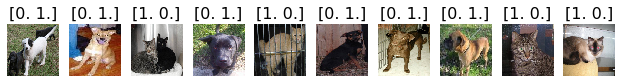

In [97]:
plots(imgs,titles=labels)

# Build and Train CNN

In [98]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(2,activation='softmax'),
])

In [99]:
model.compile(Adam(learning_rate=.0001),loss = 'categorical_crossentropy', metrics=['accuracy'])

In [103]:
#total train image = 20
#steps_per_epoch * epochs = total_train_image
#validation_steps =  batch size of valid_batches

model.fit_generator(train_batches,steps_per_epoch=4,
                    validation_data=valid_batches,validation_steps=4
                    ,epochs=5,verbose=2)

Epoch 1/5
4/4 - 1s - loss: 85.3373 - accuracy: 0.7750 - val_loss: 443.7296 - val_accuracy: 0.5000
Epoch 2/5
4/4 - 1s - loss: 38.9550 - accuracy: 0.8750 - val_loss: 348.4043 - val_accuracy: 0.4375
Epoch 3/5
4/4 - 1s - loss: 67.7377 - accuracy: 0.8000 - val_loss: 145.5374 - val_accuracy: 0.3750
Epoch 4/5
4/4 - 1s - loss: 14.0573 - accuracy: 0.8750 - val_loss: 241.8429 - val_accuracy: 0.6250
Epoch 5/5
4/4 - 1s - loss: 2.9555 - accuracy: 0.9500 - val_loss: 218.5246 - val_accuracy: 0.4375


# Predict (CNN)

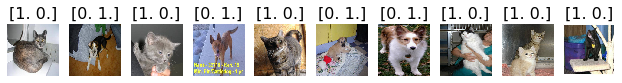

In [104]:
#grabs all images from test as batch_size = 10 and total_test_image = 10
#only one call of next is enough
test_imgs,test_labels = next(test_batches)

plots(test_imgs, titles = test_labels)


In [105]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 1.], dtype=float32)

In [106]:
#grabs all images from test as batch_size = 10 and total_test_image = 10
#only 1 of step is enough
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
print(predictions)
rounded_predictions = predictions[:,0]
rounded_predictions

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


C:\Users\Meshkat Shadik\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [107]:
cm = confusion_matrix(test_labels, rounded_predictions)
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Greens):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
        horizontalalignment="center",
        color="white" if cm[i,j]>thresh else "green")
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
        

Confusion matrix, without normalization
[[3 1]
 [6 0]]


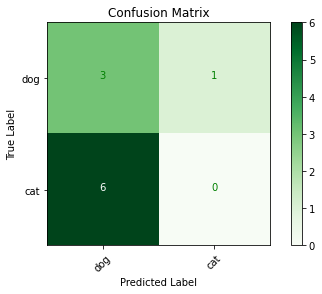

In [108]:
cm_plot_labels = ['dog','cat']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')

# VGG16

In [109]:
vgg16_model = keras.applications.vgg16.VGG16()

In [110]:
vgg16_model.summary()
# len(vgg16_model.layers)

print(vgg16_model.input)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [111]:
from tensorflow.keras import Input
model = Sequential()
model.add(Input(shape=(224, 224, 3)))
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [112]:

print(len(model.layers))

22


In [113]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         multiple                  0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [114]:
#freezing the layers
for layer in model.layers:
    layer.trainable = False

In [115]:
length = len(glob(train_path+"/*"))
model.add(Dense(length,activation='softmax'))

In [116]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         multiple                  0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

Compile New Model

In [117]:
model.compile(Adam(learning_rate=.0001),loss = 'categorical_crossentropy', metrics=['accuracy'])

In [118]:
r = model.fit_generator(train_batches, steps_per_epoch=4,validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

C:\Users\Meshkat Shadik\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
4/4 - 8s - loss: 1.1976 - accuracy: 0.6500 - val_loss: 0.9545 - val_accuracy: 0.6875
Epoch 2/5
4/4 - 7s - loss: 0.7698 - accuracy: 0.7250 - val_loss: 0.5876 - val_accuracy: 0.7500
Epoch 3/5
4/4 - 7s - loss: 0.5552 - accuracy: 0.7750 - val_loss: 0.6398 - val_accuracy: 0.6250
Epoch 4/5
4/4 - 8s - loss: 0.4234 - accuracy: 0.8000 - val_loss: 0.5739 - val_accuracy: 0.6250
Epoch 5/5
4/4 - 8s - loss: 0.2980 - accuracy: 0.8500 - val_loss: 0.4799 - val_accuracy: 0.7500


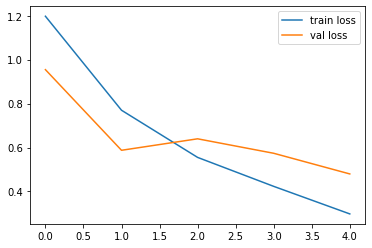

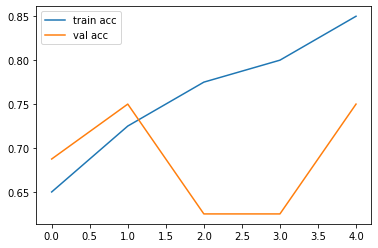

In [119]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Prediction VGG16

C:\Users\Meshkat Shadik\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


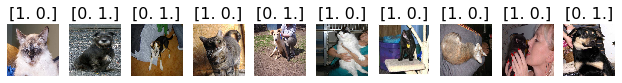

In [120]:
#grabs all images from test as batch_size = 10 and total_test_image = 10
#only one call of next is enough
test_imgs,test_labels = next(test_batches)

plots(test_imgs, titles = test_labels)


In [121]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 1., 0., 1., 1., 1., 1., 0.], dtype=float32)

In [122]:
#grabs all images from test as batch_size = 10 and total_test_image = 10
#only 1 of step is enough
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
predictions
rounded_predictions = np.round(predictions[:,0])
rounded_predictions

C:\Users\Meshkat Shadik\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [123]:
cm = confusion_matrix(test_labels, rounded_predictions)
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Greens):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
        horizontalalignment="center",
        color="white" if cm[i,j]>thresh else "green")
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
        

Confusion matrix, without normalization
[[4 0]
 [5 1]]


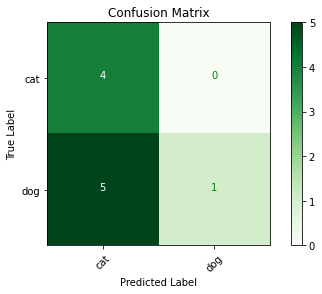

In [124]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')